In [162]:
### Provincial job posting canada###

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv(r'C:\Users\Reet\Downloads\dataset\Time_series\provincial_postings_ca.csv')
print(df.head(3))

         date province  indeed_job_postings_index
0  2020-02-01       ab                     100.00
1  2020-02-02       ab                      99.86
2  2020-02-03       ab                      99.83


In [163]:
df_total_groupby = df.groupby('province')['indeed_job_postings_index'].sum()
df_total_groupby = pd.DataFrame(df_total_groupby)
df_total_groupby = df_total_groupby.sort_values(['indeed_job_postings_index'],ascending=False)
df_total_groupby

,indeed_job_postings_index
province,
nu,251765.90
nl,195800.37
ns,188671.30
nt,184687.19
sk,183980.65
pe,180299.27
ab,177938.24
nb,174556.92
qc,168044.69


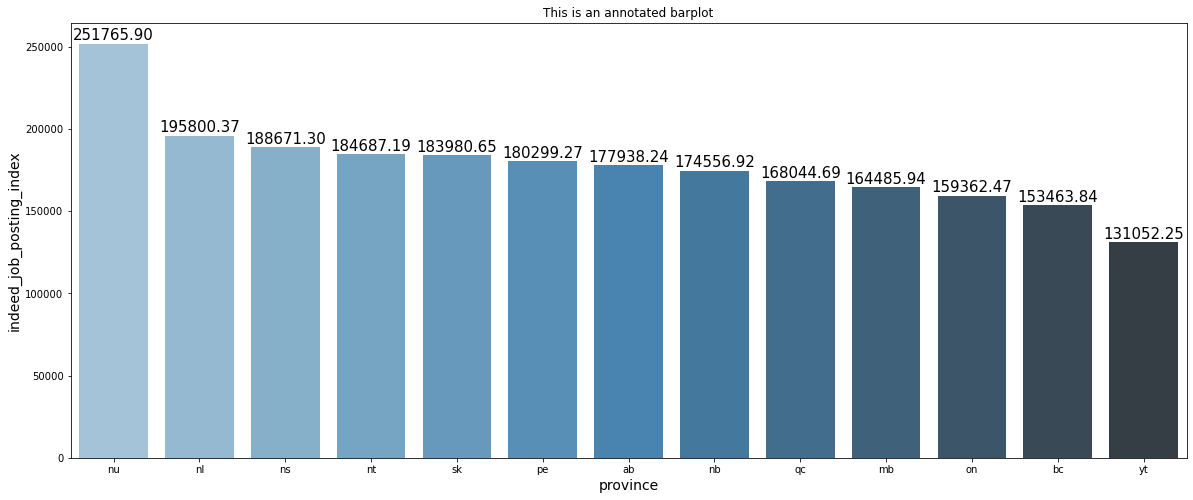

In [164]:
plt.figure(figsize=(20, 8))
plots = sns.barplot(x=df_total_groupby.index, y="indeed_job_postings_index", 
                    data=df_total_groupby,palette=("Blues_d"))
 
for bar in plots.patches:
    plots.annotate(format(bar.get_height(), '.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=15, xytext=(0, 8),
                   textcoords='offset points')

plt.xlabel("province", size=14)
plt.ylabel("indeed_job_posting_index", size=14)
plt.title("This is an annotated barplot")
plt.show()

In [165]:
df.groupby('province')['indeed_job_postings_index'].sum()

province
ab    177938.24
bc    153463.84
mb    164485.94
nb    174556.92
nl    195800.37
ns    188671.30
nt    184687.19
nu    251765.90
on    159362.47
pe    180299.27
qc    168044.69
sk    183980.65
yt    131052.25
Name: indeed_job_postings_index, dtype: float64

In [166]:
df.head()

,date,province,indeed_job_postings_index
0,2020-02-01,ab,100.00
1,2020-02-02,ab,99.86
2,2020-02-03,ab,99.83
3,2020-02-04,ab,99.74
4,2020-02-05,ab,99.61


In [167]:
df['date'] = pd.to_datetime(df['date'])

In [168]:
#df['day'] = df['date'].map(lambda x: x.day)
#df['month'] = df['date'].map(lambda x: x.month)
#df['year'] = df['date'].map(lambda x: x.year)

In [169]:
df.head()

,date,province,indeed_job_postings_index,day,month,year
0,2020-02-01,ab,100.00,1,2,2020
1,2020-02-02,ab,99.86,2,2,2020
2,2020-02-03,ab,99.83,3,2,2020
3,2020-02-04,ab,99.74,4,2,2020
4,2020-02-05,ab,99.61,5,2,2020


In [170]:
df_grouped_year = df.groupby(['province','year'])['indeed_job_postings_index'].sum()
df_grouped_year = pd.DataFrame(df_grouped_year)
#df_grouped_year = df_grouped_year.unstack(level = 1)
df_grouped_year.head()

indeed_job_postings_index
province year                           
ab       2020                   25094.80
         2021                   48273.77
         2022                   67276.70
         2023                   37292.97
bc       2020                   25384.85

In [183]:
year_list = []
a = 2019
for i in range(0,52):
    if(a<2023):
        a = a +1
        year_list.append(a)
        
    else:
        a = 2020
        year_list.append(a)
    


In [197]:
df_grouped_year['year'] = pd.DataFrame(year_list)
year_list = pd.DataFrame(year_list)
year_list.rename(columns = {0:'year'}, inplace = True)
year_list = year_list.set_index(df_grouped_year.index)
year_list.head(5)

year
province year      
ab       2020  2020
         2021  2021
         2022  2022
         2023  2023
bc       2020  2020

In [205]:
list_province = pd.DataFrame(df['province'].unique())

In [241]:
df['province'].unique()

array(['ab', 'bc', 'mb', 'nb', 'nl', 'ns', 'nt', 'nu', 'on', 'pe', 'qc',
       'sk', 'yt'], dtype=object)

In [212]:
len(list_province)

13

In [218]:
list_province.values[0]

array(['ab'], dtype=object)

In [233]:
list_prov = []

for i in range(0,13):
    list_prov.append(list_province.values[i])
    list_prov.append(list_province.values[i])
    list_prov.append(list_province.values[i])
    list_prov.append(list_province.values[i])

list_prov = pd.DataFrame(list_prov)
list_prov .rename(columns = {0:'provinces'}, inplace = True)
list_prov = list_prov.set_index(df_grouped_year.index)


In [234]:
df_grouped_year['provinces'] = list_prov

In [237]:
df_grouped_year.head(10)

indeed_job_postings_index  year provinces
province year                                           
ab       2020                   25094.80  2020        ab
         2021                   48273.77  2021        ab
         2022                   67276.70  2022        ab
         2023                   37292.97  2023        ab
bc       2020                   25384.85  2020        bc
         2021                   44869.38  2021        bc
         2022                   55021.85  2022        bc
         2023                   28187.76  2023        bc
mb       2020                   26916.96  2020        mb
         2021                   45692.41  2021        mb

In [243]:
df_grouped_year2 = df_grouped_year

In [248]:
x_pos = np.arange(len(y_2023))

In [249]:
x_pos

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12])

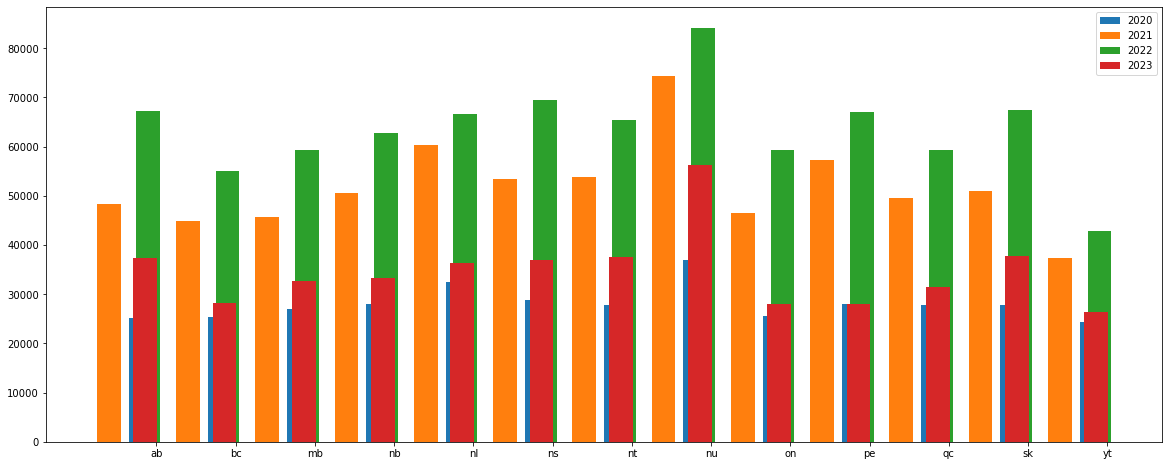

In [271]:
y_2020 = df_grouped_year[df_grouped_year['year'] == 2020]
y_2021 = df_grouped_year[df_grouped_year['year'] == 2021]
y_2022 = df_grouped_year[df_grouped_year['year'] == 2022]
y_2023 = df_grouped_year[df_grouped_year['year'] == 2023]

x_pos = np.arange(len(y_2023))
tick_labels = ['ab', 'bc', 'mb', 'nb', 'nl', 'ns', 'nt', 'nu', 'on', 'pe', 'qc',
       'sk', 'yt']

plt.figure(figsize=(20, 8))
plt.bar(x_pos - 0.2, y_2020['indeed_job_postings_index'], width=0.3, label='2020')
plt.bar(x_pos - 0.6, y_2021['indeed_job_postings_index'], width=0.3, label='2021')
plt.bar(x_pos - 0.10, y_2022['indeed_job_postings_index'], width=0.3, label='2022')
plt.bar(x_pos - 0.14, y_2023['indeed_job_postings_index'], width=0.3, label='2023')
plt.xticks(x_pos, tick_labels)
plt.legend()
plt.show()